In [146]:
#import required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [147]:
#load data from csv
data = pd.read_csv("all_data.csv")

In [148]:
#data overview
#renaming columns for ease of use
data.columns=['country', 'year', 'life_exp', 'gdp']
#making gdp more readable, putting amounts in billions
data['gdp'] = data['gdp'].map(lambda x: round(x/1000000000,2))
#shortening USA
data = data.replace('United States of America', 'USA')
data.head()

,country,year,life_exp,gdp
0,Chile,2000,77.3,77.86
1,Chile,2001,77.3,70.98
2,Chile,2002,77.8,69.74
3,Chile,2003,77.9,75.64
4,Chile,2004,78.0,99.21


In [149]:
#pulling out country names for label use
countries=data.country.unique()

In [150]:
#creating dataframes for each country
country_data = {}
for country in countries:
    country_title = str(country).strip().lower() #clean and prep the country name for variable usage
    country_data[country_title] = data[data['country'] == country]  # Filter and store the data

In [151]:
#calculating differences between min/max values to see if there's a relation in rates of change
results = []
for country in countries:
    country_title = str(country).strip().lower() #clean and prep the country name for variable usage
    country_data[country_title] = data[data['country'] == country]  # Filter and store the data
    life_change = country_data[country_title]['life_exp'].max() - country_data[country_title]['life_exp'].min()
    gdp_change = country_data[country_title]['gdp'].max() - country_data[country_title]['gdp'].min()
    ratio = (life_change/gdp_change)
    results.append({'country':country, 'life_change':life_change, 'gdp_change':gdp_change, 'ratio':ratio})
changes = pd.DataFrame(results)
#pulled out Zimbabwe as an outlier to see effect
changes_no_z = changes.iloc[:-1]

PearsonRResult(statistic=0.3432067411056175, pvalue=0.000618713134588947)
-4768.169545732638 100.82800562174712


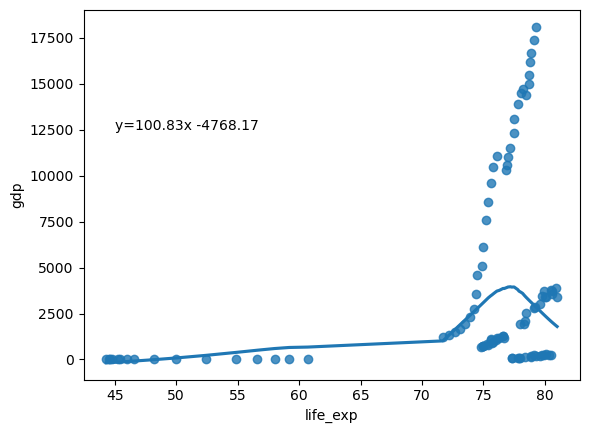

<Figure size 640x480 with 0 Axes>

In [160]:
x=data['life_exp']
y=data['gdp']
results = stats.pearsonr(x,y)
print(results)
plot = sns.regplot(data=data, x=x, y=y, lowess=True)
slope, intercept, r, p, sterr = stats.linregress(x=plot.get_lines()[0].get_xdata(), y=plot.get_lines()[0].get_ydata())
print(intercept, slope)
plt.annotate(f"y={round(slope,2)}x {round(intercept,2)}", xy=(45,12500))
plt.show()
plt.clf()


PearsonRResult(statistic=0.9498801906555392, pvalue=1.8650132863202602e-08)


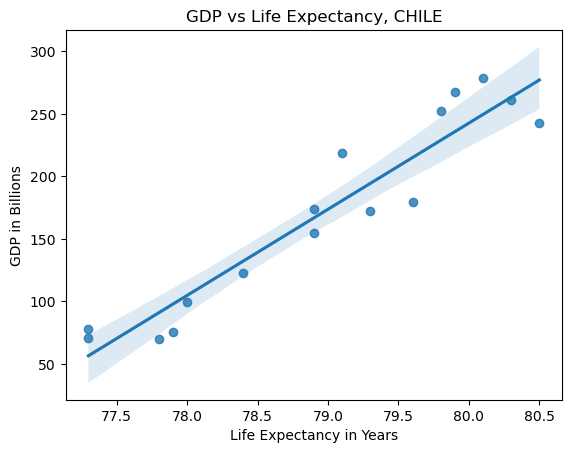

PearsonRResult(statistic=0.9085255408648358, pvalue=1.125098572070064e-06)


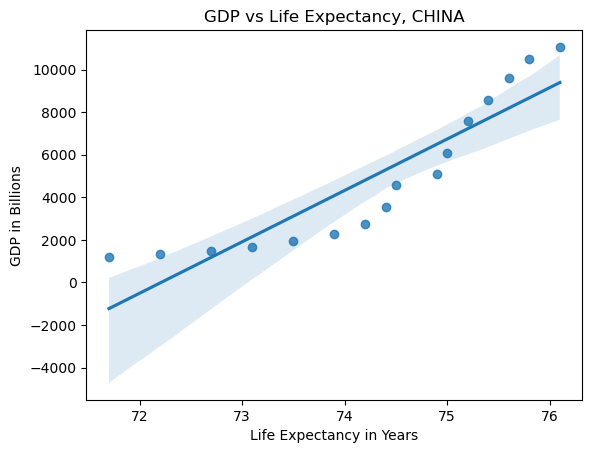

PearsonRResult(statistic=0.932698898256127, pvalue=1.4018815534045607e-07)


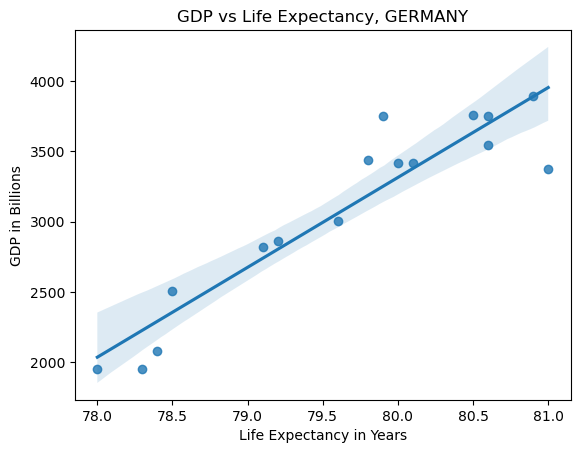

PearsonRResult(statistic=0.9322377055458615, pvalue=1.4686976854450888e-07)


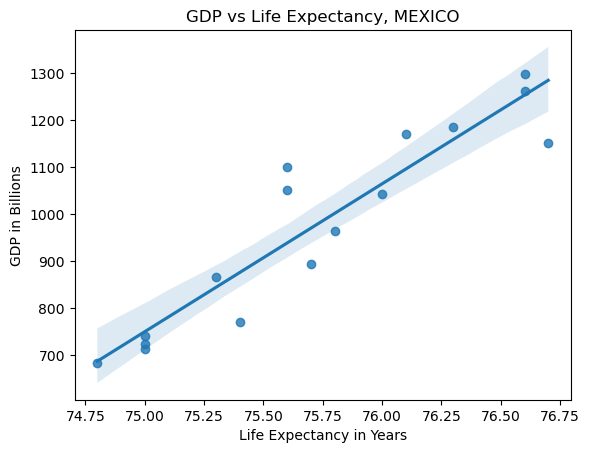

PearsonRResult(statistic=0.9817092382430257, pvalue=1.749970926909946e-11)


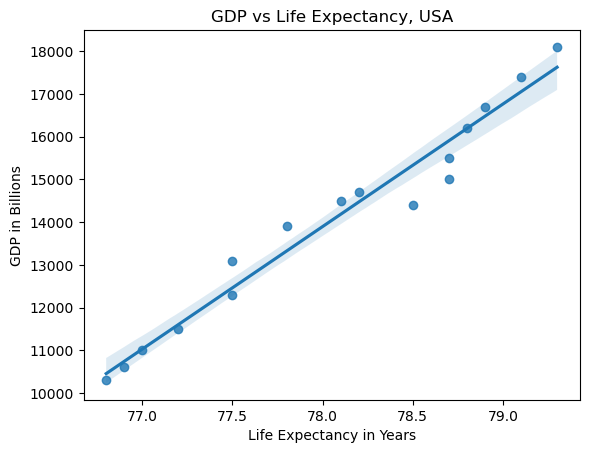

PearsonRResult(statistic=0.9661897667268308, pvalue=1.2384130160512204e-09)


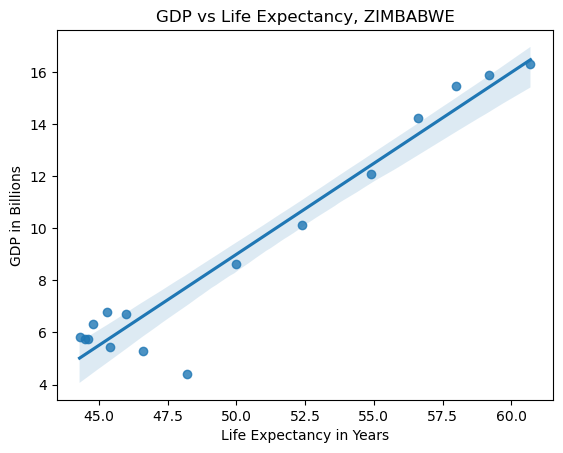

<Figure size 640x480 with 0 Axes>

In [162]:
for key in country_data:
    x = country_data[key]['life_exp']
    y = country_data[key]['gdp']
    results = stats.pearsonr(x,y)
    print(results)
    sns.regplot(data = country_data[key], x = x, y =y)
    plt.title(f"GDP vs Life Expectancy, {str(key).upper()}")
    plt.xlabel('Life Expectancy in Years')
    plt.ylabel('GDP in Billions')
    plt.show()
    plt.clf()

847.114573454523 49.24052641404757


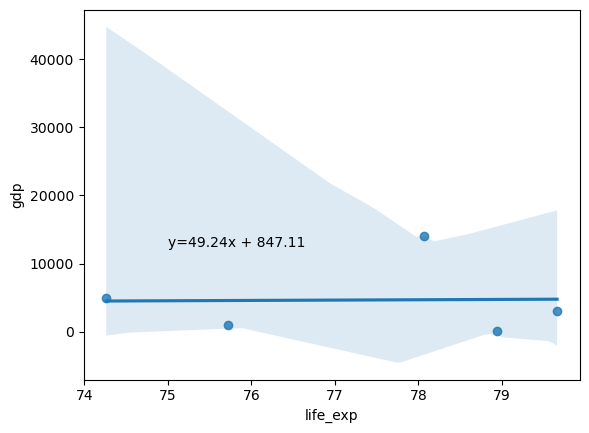

<Figure size 640x480 with 0 Axes>

In [129]:
avg_data = data[['country', 'life_exp', 'gdp']].groupby('country').mean().apply(lambda x: round(x,2)).reset_index()
avg_plot = sns.regplot(data=avg_data.iloc[:-1], x='life_exp', y='gdp')
slope, intercept, r, p, sterr = stats.linregress(x=avg_plot.get_lines()[0].get_xdata(), y=avg_plot.get_lines()[0].get_ydata())
print(intercept, slope)
plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}", xy=(75,12500))
plt.show()
plt.clf()


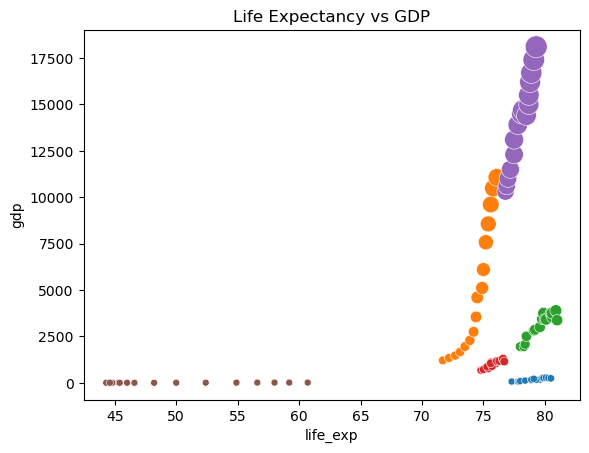

<Figure size 640x480 with 0 Axes>

In [9]:
sns.scatterplot(y=data.gdp, x= data.life_exp, hue = data.country, size=data.gdp, sizes=(25,250), legend=False)
plt.title('Life Expectancy vs GDP')
plt.show()
plt.clf()

In [11]:
#pivoting data to look at country info by year
life_pivot = data.pivot(index='country', columns='year', values='life_exp')
life_pivot.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Chile,77.3,77.3,77.8,77.9,78.0,78.4,78.9,78.9,79.6,79.3,79.1,79.8,79.9,80.1,80.3,80.5
China,71.7,72.2,72.7,73.1,73.5,73.9,74.2,74.4,74.5,74.9,75.0,75.2,75.4,75.6,75.8,76.1
Germany,78.0,78.3,78.4,78.5,79.1,79.2,79.6,79.8,79.9,80.0,80.1,80.5,80.6,80.6,80.9,81.0
Mexico,74.8,75.0,75.0,75.0,75.4,75.3,75.8,76.0,75.6,75.7,75.6,76.1,76.3,76.6,76.6,76.7
USA,76.8,76.9,77.0,77.2,77.5,77.5,77.8,78.1,78.2,78.5,78.7,78.7,78.8,78.9,79.1,79.3


In [12]:
gdp_pivot = data.pivot(index='country', columns='year', values='gdp')
#gdp_pivot.reset_index(inplace=True)
gdp_pivot.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Chile,77.86,70.98,69.74,75.64,99.21,122.97,154.79,173.61,179.64,172.39,218.54,252.25,267.12,278.38,260.99,242.52
China,1211.35,1339.40,1470.55,1660.29,1955.35,2285.97,2752.13,3552.18,4598.21,5109.95,6100.62,7572.55,8560.55,9607.22,10482.40,11064.70
Germany,1949.95,1950.65,2079.14,2505.73,2819.25,2861.41,3002.45,3439.95,3752.37,3418.01,3417.09,3757.70,3543.98,3752.51,3890.61,3375.61
Mexico,683.65,724.70,741.56,713.28,770.27,866.35,965.28,1043.47,1101.28,894.95,1051.13,1171.19,1186.60,1261.98,1298.46,1152.26
USA,10300.00,10600.00,11000.00,11500.00,12300.00,13100.00,13900.00,14500.00,14700.00,14400.00,15000.00,15500.00,16200.00,16700.00,17400.00,18100.00


In [13]:
year_pivot = data.pivot(index = 'year', columns = 'country', values = 'life_exp')
year_pivot.head()

country,Chile,China,Germany,Mexico,USA,Zimbabwe
year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3


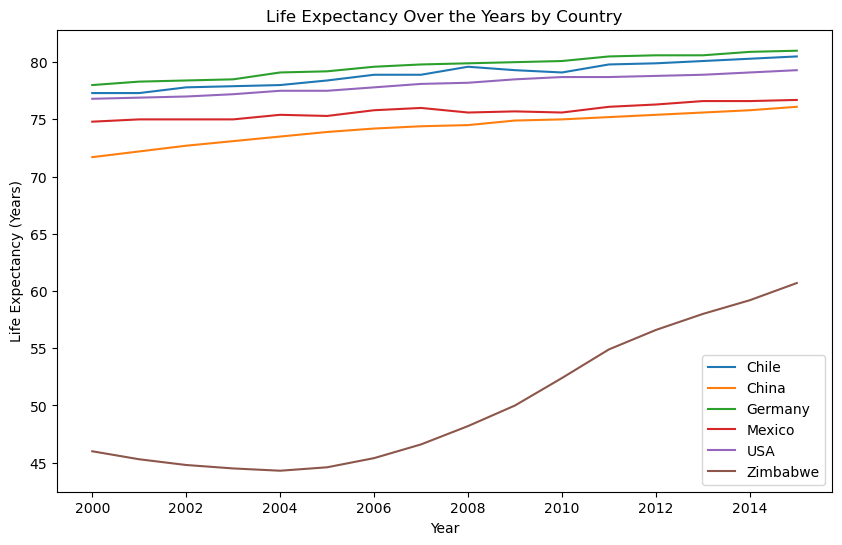

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
for country in year_pivot.columns:
    plt.plot(year_pivot.index, year_pivot[country], label=country)
plt.legend()
plt.title("Life Expectancy Over the Years by Country")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.show()
plt.clf()

In [15]:
data.head()

,country,year,life_exp,gdp
0,Chile,2000,77.3,77.86
1,Chile,2001,77.3,70.98
2,Chile,2002,77.8,69.74
3,Chile,2003,77.9,75.64
4,Chile,2004,78.0,99.21
